In [34]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json

# Aggressive MPC

## Load the json files and model files

In [35]:
# Open and read the JSON file
with open('cva_aggre_outputs.json', 'r') as file:
    cva_mpc_data = json.load(file)
    
with open('mkcva_aggre_outputs.json', 'r') as file:
    mkcva_mpc_data = json.load(file)
    
with open('lstm_aggre_outputs.json', 'r') as file:
    lstm_mpc_data = json.load(file)

# Save the CVA data into variables
cva_u_save = np.array(cva_mpc_data["u_save"])
cva_u_ipopt = np.array(cva_mpc_data["ipopt_save"])
cva_dae = np.array(cva_mpc_data["dae_save"])
cva_mdl = np.array(cva_mpc_data["mdl_save"])
cva_y_pyomo = np.array(cva_mpc_data["y_pyomo_save"])
cva_y_noisy = np.array(cva_mpc_data["y_noisy_save"])

# Save the MKCVA data into variables
mkcva_u_save = np.array(mkcva_mpc_data["u_save"])
mkcva_u_ipopt = np.array(mkcva_mpc_data["ipopt_save"])
mkcva_dae = np.array(mkcva_mpc_data["dae_save"])
mkcva_mdl = np.array(mkcva_mpc_data["mdl_save"])
mkcva_y_pyomo = np.array(mkcva_mpc_data["y_pyomo_save"])
mkcva_y_noisy = np.array(mkcva_mpc_data["y_noisy_save"])

# Save the LSTM data into variables
lstm_u_save = np.array(lstm_mpc_data["u_save"])
lstm_u_ipopt = np.array(lstm_mpc_data["ipopt_save"])
lstm_dae = np.array(lstm_mpc_data["dae_save"])
lstm_mdl = np.array(lstm_mpc_data["mdl_save"])
lstm_y_pyomo = np.array(lstm_mpc_data["y_pyomo_save"])
lstm_y_noisy = np.array(lstm_mpc_data["y_noisy_save"])

## View the MPC results

Horizon: 0 min to 10 min


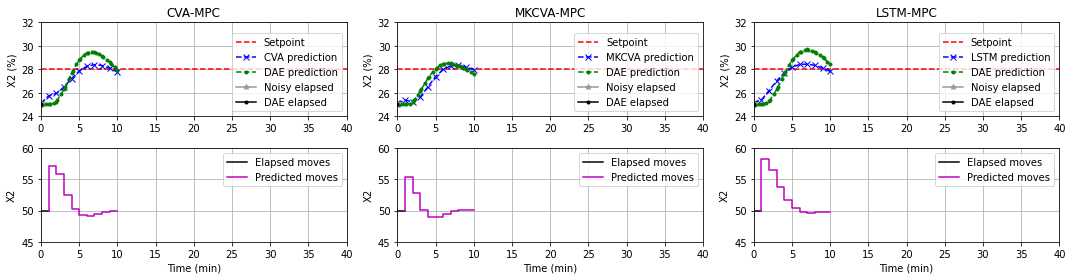

Horizon: 1 min to 11 min


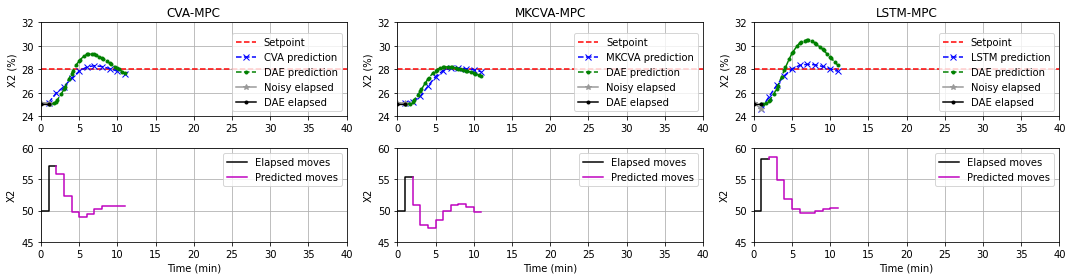

Horizon: 2 min to 12 min


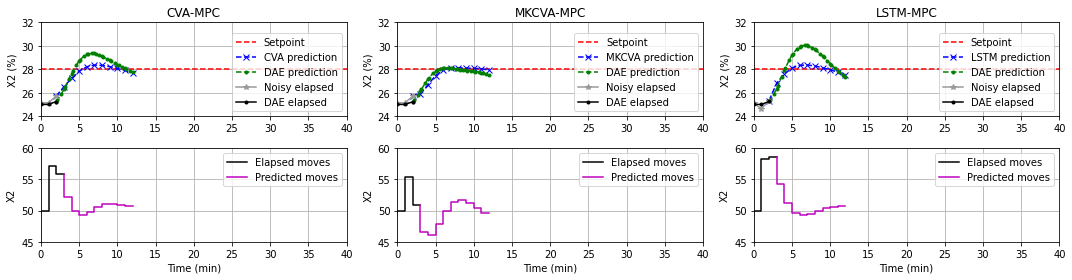

Horizon: 3 min to 13 min


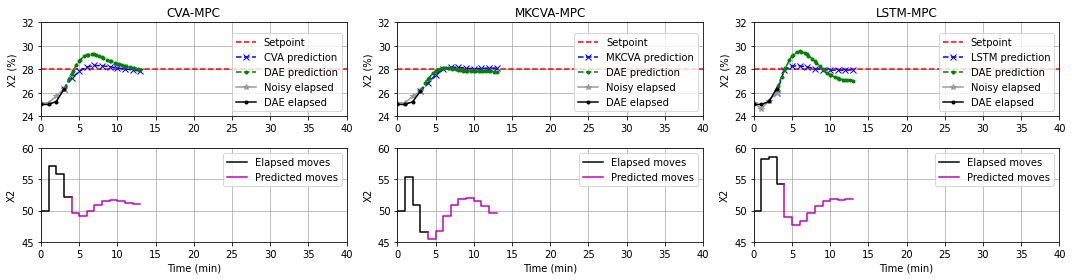

Horizon: 4 min to 14 min


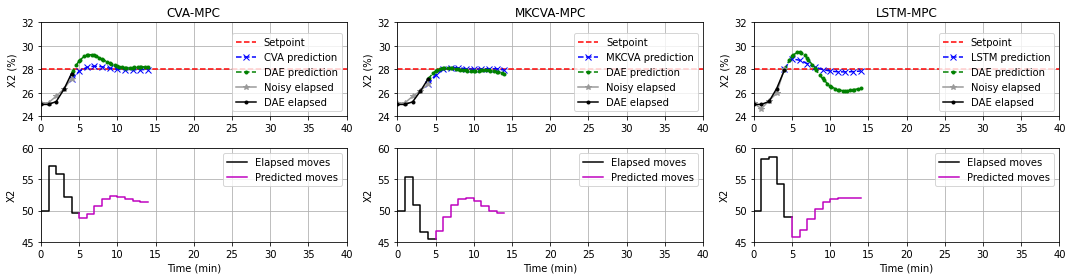

Horizon: 5 min to 15 min


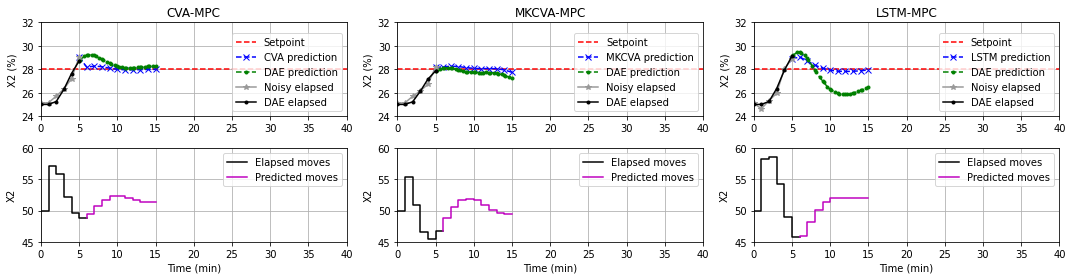

Horizon: 6 min to 16 min


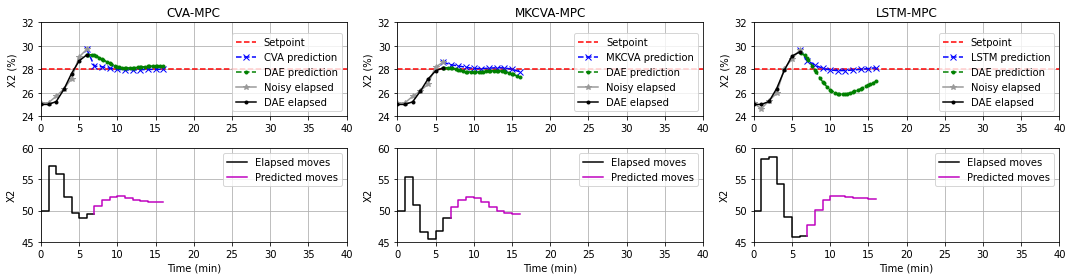

Horizon: 7 min to 17 min


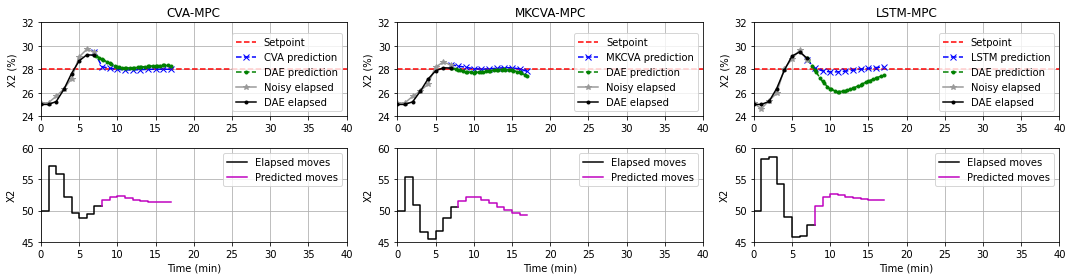

Horizon: 8 min to 18 min


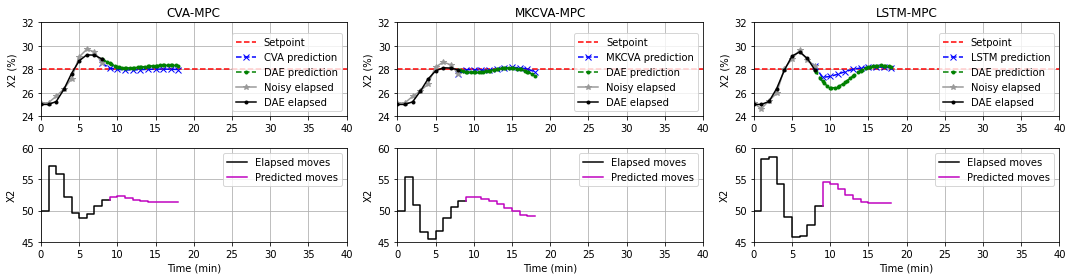

Horizon: 9 min to 19 min


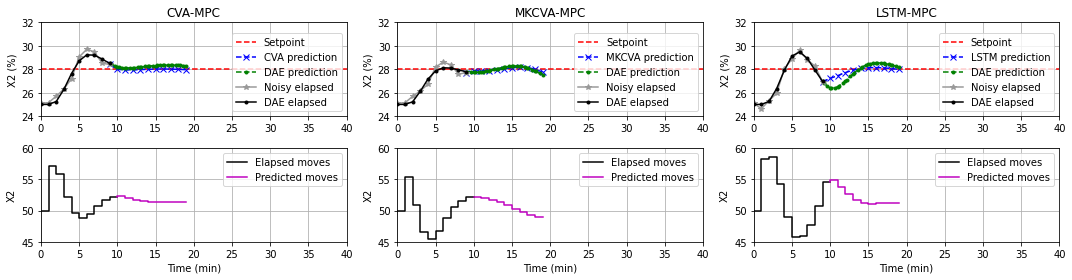

Horizon: 10 min to 20 min


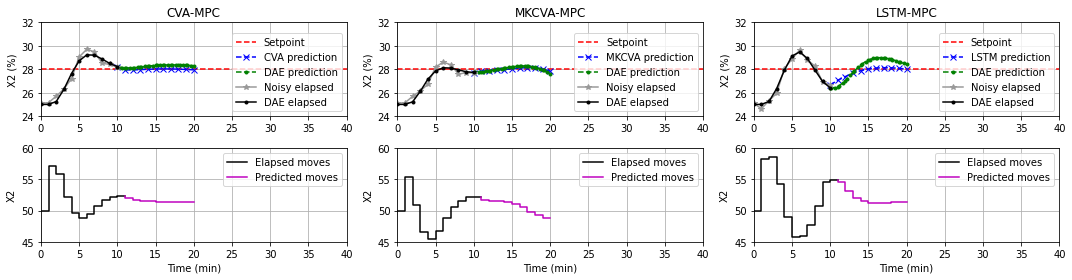

Horizon: 11 min to 21 min


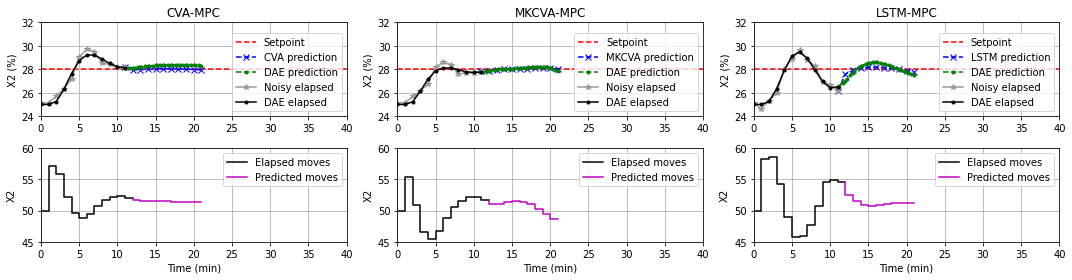

Horizon: 12 min to 22 min


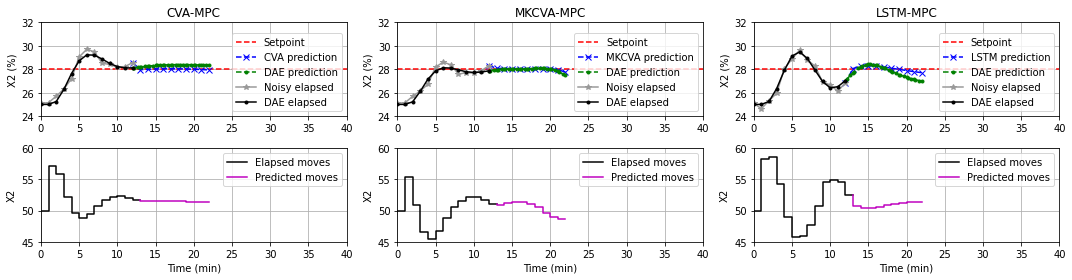

Horizon: 13 min to 23 min


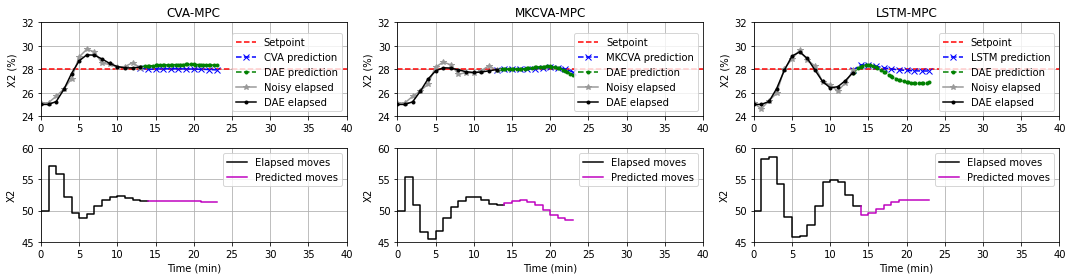

Horizon: 14 min to 24 min


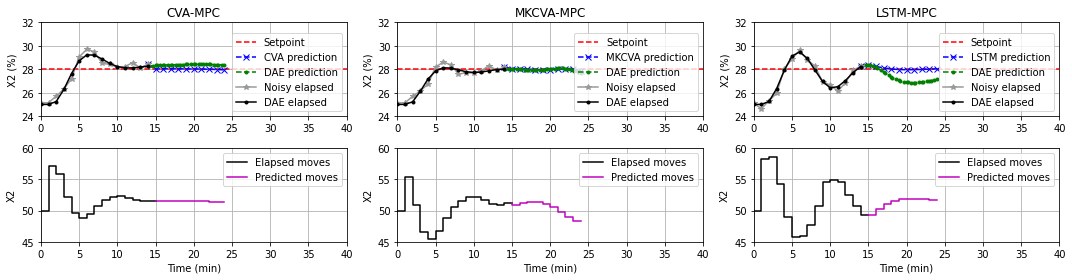

Horizon: 15 min to 25 min


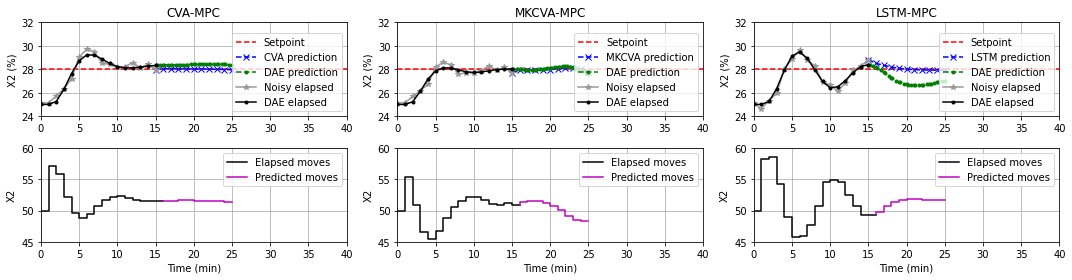

Horizon: 16 min to 26 min


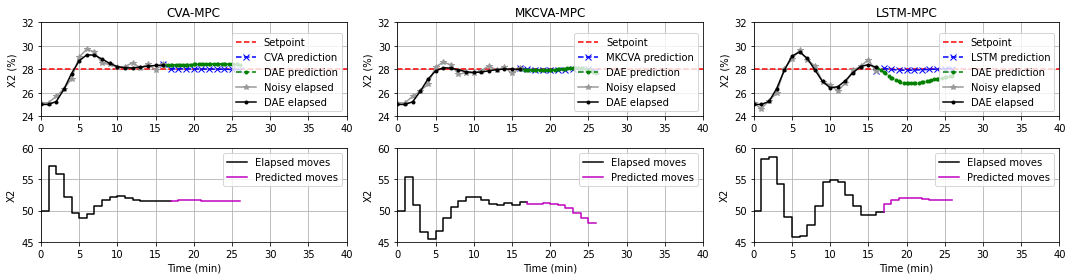

Horizon: 17 min to 27 min


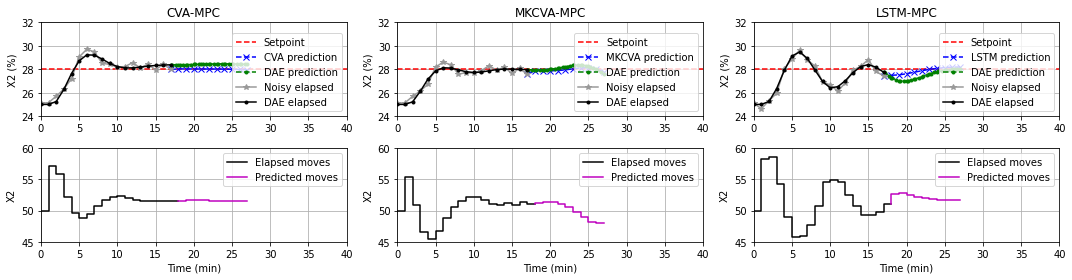

Horizon: 18 min to 28 min


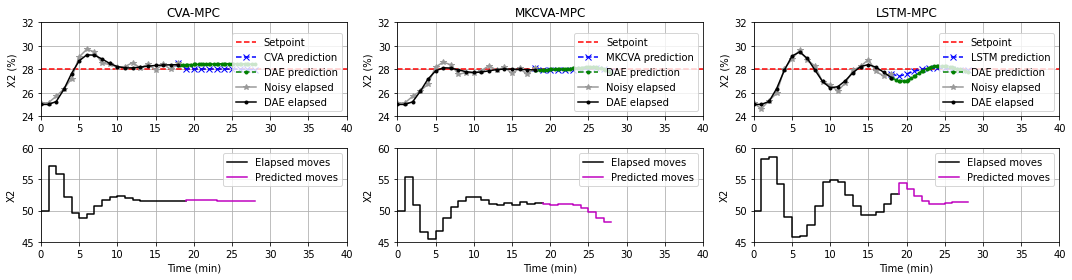

Horizon: 19 min to 29 min


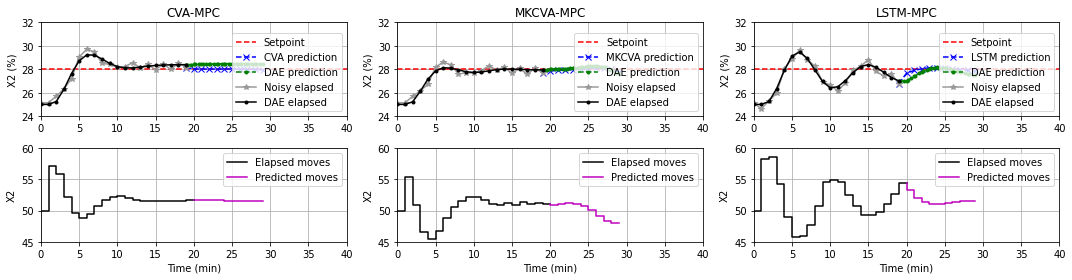

In [37]:
X2_sp = 28    # Setpoint for X2
u_names = ['L2', 'P2', 'X2']

colloc_idx = np.array([0, 0.155051, 0.644949, 1, 1.155051, 1.644949,
                       2, 2.155051, 2.644949, 3, 3.155051, 3.644949,
                       4, 4.155051, 4.644949, 5, 5.155051, 5.644949,
                       6, 6.155051, 6.644949, 7, 7.155051, 7.644949, 
                       8, 8.155051, 8.644949, 9, 9.155051, 9.644949, 10])

for t in range(20):
    cva_u = (cva_u_ipopt[t, :].reshape(-1, 3)-0.5) * np.array([100, 100, 20]) + \
                                                     np.array([208, 194.7, 50])

    mkcva_u = (mkcva_u_ipopt[t, :].reshape(-1, 3)-0.5) * np.array([100, 100, 20]) + \
                                                         np.array([208, 194.7, 50])

    lstm_u = (lstm_u_ipopt[t, :].reshape(-1, 3)-0.5) * np.array([100, 100, 20]) + \
                                                       np.array([208, 194.7, 50])
    
    cva_y = cva_mdl[t, :].reshape(-1, 3)[:, -1]
    mkcva_y = mkcva_mdl[t, :].reshape(-1, 3)[:, -1]
    lstm_y = lstm_mdl[t, :].reshape(-1, 3)[:, -1]
    
    #if t == 4 or t == 6 or t == 8 or t == 10:
    if True:
        print(f"Horizon: {t} min to {t+10} min")
        plt.figure(figsize=(15, 4))
        
        # Plot CVA MPC results
        plt.subplot(2,3,1)
        plt.plot(np.array([0, 40]), np.array([X2_sp, X2_sp]), 'r--', label='Setpoint')
        plt.plot(t + np.arange(0, len(cva_y)), cva_y, 'bx--', label='CVA prediction')
        plt.plot(t + colloc_idx, cva_dae[:, -1, t], 'g.--', label='DAE prediction')
        plt.plot(np.arange(t+1), cva_y_noisy[:t+1, -1], '*-', c='0.6', label='Noisy elapsed')
        plt.plot(np.arange(t+1), cva_y_pyomo[:t+1, -1], 'k.-', label='DAE elapsed')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.legend(loc='lower right')
        plt.title('CVA-MPC')
        plt.ylabel('X2 (%)')
        plt.xlim([0, 40])
        plt.ylim([24, 32])
        plt.grid()

        plt.subplot(2,3,4)
        plt.step(np.arange(t+2), np.hstack((cva_u_save[:t+1, -1], cva_u_save[t, -1])), 
                 where='post', c='k', label='Elapsed moves')
        plt.step(t+1 + np.arange(10), 
                 np.hstack((cva_u_save[t, -1],
                            cva_u[:, 2])),
                 where='pre', c='m', label='Predicted moves')
        plt.ylabel(u_names[2])
        plt.xlabel('Time (min)')
        plt.legend(loc='upper right')
        plt.xlim([0, 40])
        plt.ylim([45, 60])
        #plt.ylim([30, 60])
        plt.grid()
        
        # Plot MKCVA MPC results
        plt.subplot(2,3,2)
        plt.plot(np.array([0, 40]), np.array([X2_sp, X2_sp]), 'r--', label='Setpoint')
        plt.plot(t + np.arange(0, len(mkcva_y)), mkcva_y, 'bx--', label='MKCVA prediction')
        plt.plot(t + colloc_idx, mkcva_dae[:, -1, t], 'g.--', label='DAE prediction')
        plt.plot(np.arange(t+1), mkcva_y_noisy[:t+1, -1], '*-', c='0.6', label='Noisy elapsed')
        plt.plot(np.arange(t+1), mkcva_y_pyomo[:t+1, -1], 'k.-', label='DAE elapsed')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.legend(loc='lower right')
        plt.title('MKCVA-MPC')
        plt.ylabel('X2 (%)')
        plt.xlim([0, 40])
        plt.ylim([24, 32])
        plt.grid()

        plt.subplot(2,3,5)
        plt.step(np.arange(t+2), np.hstack((mkcva_u_save[:t+1, -1], mkcva_u_save[t, -1])), 
                 where='post', c='k', label='Elapsed moves')
        plt.step(t+1 + np.arange(10), 
                 np.hstack((mkcva_u_save[t, -1],
                            mkcva_u[:, 2])),
                 where='pre', c='m', label='Predicted moves')
        plt.ylabel(u_names[2])
        plt.xlabel('Time (min)')
        plt.legend(loc='upper right')
        plt.xlim([0, 40])
        plt.ylim([45, 60])
        #plt.ylim([30, 60])
        plt.grid()
        
        
        # Plot LSTM MPC results
        plt.subplot(2,3,3)
        plt.plot(np.array([0, 40]), np.array([X2_sp, X2_sp]), 'r--', label='Setpoint')
        plt.plot(t + np.arange(0, len(lstm_y)), lstm_y, 'bx--', label='LSTM prediction')
        plt.plot(t + colloc_idx, lstm_dae[:, -1, t], 'g.--', label='DAE prediction')
        plt.plot(np.arange(t+1), lstm_y_noisy[:t+1, -1], '*-', c='0.6', label='Noisy elapsed')
        plt.plot(np.arange(t+1), lstm_y_pyomo[:t+1, -1], 'k.-', label='DAE elapsed')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.legend(loc='lower right')
        plt.title('LSTM-MPC')
        plt.ylabel('X2 (%)')
        plt.xlim([0, 40])
        plt.ylim([24, 32])
        plt.grid()

        plt.subplot(2,3,6)
        plt.step(np.arange(t+2), np.hstack((lstm_u_save[:t+1, -1], lstm_u_save[t, -1])), 
                 where='post', c='k', label='Elapsed moves')
        plt.step(t+1 + np.arange(10), 
                 np.hstack((lstm_u_save[t, -1],
                            lstm_u[:, 2])),
                 where='pre', c='m', label='Predicted moves')
        plt.ylabel(u_names[2])
        plt.xlabel('Time (min)')
        plt.legend(loc='upper right')
        plt.xlim([0, 40])
        plt.ylim([45, 60])
        #plt.ylim([30, 60])
        plt.grid()
        
        plt.tight_layout()
        plt.savefig(f"fig_mpc_aggre_hor{t}.png", dpi=300)
        plt.show()

# Conservative MPC

In [38]:
# Open and read the JSON file
with open('cva_cons_outputs.json', 'r') as file:
    cva_mpc_data = json.load(file)
    
with open('mkcva_cons_outputs.json', 'r') as file:
    mkcva_mpc_data = json.load(file)
    
with open('lstm_cons_outputs.json', 'r') as file:
    lstm_mpc_data = json.load(file)

# Save the CVA data into variables
cva_u_save = np.array(cva_mpc_data["u_save"])
cva_u_ipopt = np.array(cva_mpc_data["ipopt_save"])
cva_dae = np.array(cva_mpc_data["dae_save"])
cva_mdl = np.array(cva_mpc_data["mdl_save"])
cva_y_pyomo = np.array(cva_mpc_data["y_pyomo_save"])
cva_y_noisy = np.array(cva_mpc_data["y_noisy_save"])

# Save the MKCVA data into variables
mkcva_u_save = np.array(mkcva_mpc_data["u_save"])
mkcva_u_ipopt = np.array(mkcva_mpc_data["ipopt_save"])
mkcva_dae = np.array(mkcva_mpc_data["dae_save"])
mkcva_mdl = np.array(mkcva_mpc_data["mdl_save"])
mkcva_y_pyomo = np.array(mkcva_mpc_data["y_pyomo_save"])
mkcva_y_noisy = np.array(mkcva_mpc_data["y_noisy_save"])

# Save the LSTM data into variables
lstm_u_save = np.array(lstm_mpc_data["u_save"])
lstm_u_ipopt = np.array(lstm_mpc_data["ipopt_save"])
lstm_dae = np.array(lstm_mpc_data["dae_save"])
lstm_mdl = np.array(lstm_mpc_data["mdl_save"])
lstm_y_pyomo = np.array(lstm_mpc_data["y_pyomo_save"])
lstm_y_noisy = np.array(lstm_mpc_data["y_noisy_save"])

Horizon: 0 min to 10 min


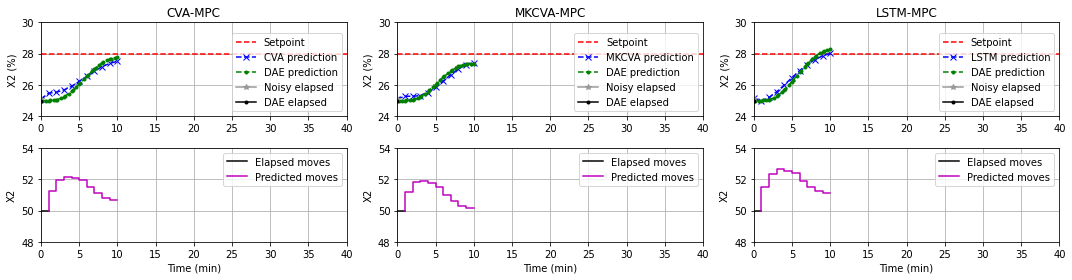

Horizon: 1 min to 11 min


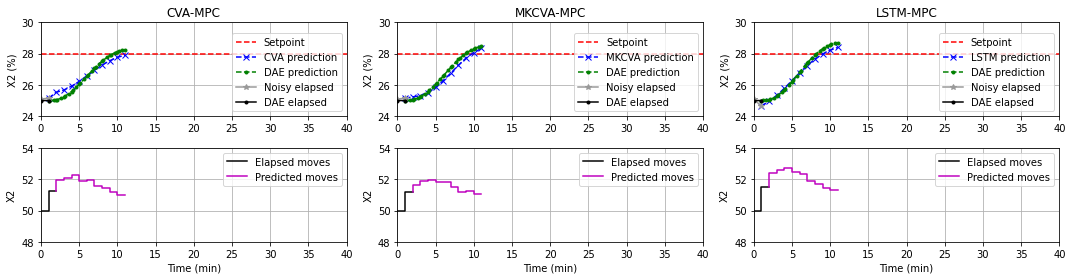

Horizon: 2 min to 12 min


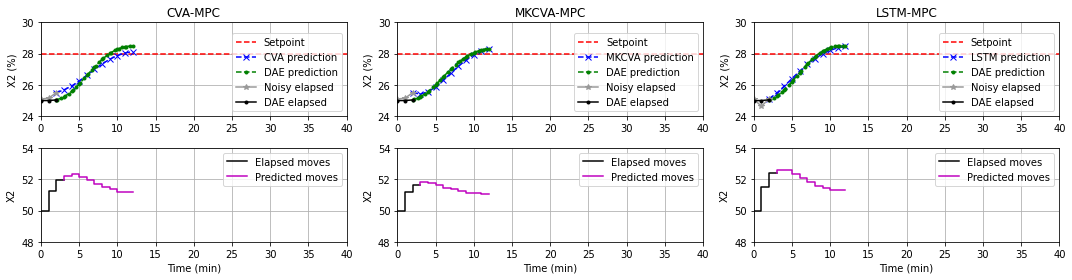

Horizon: 3 min to 13 min


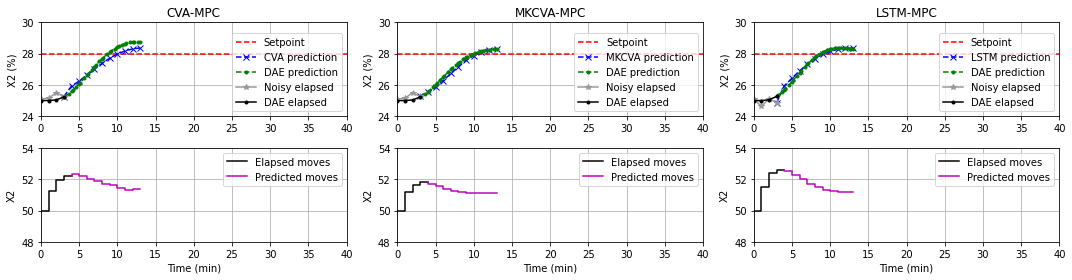

Horizon: 4 min to 14 min


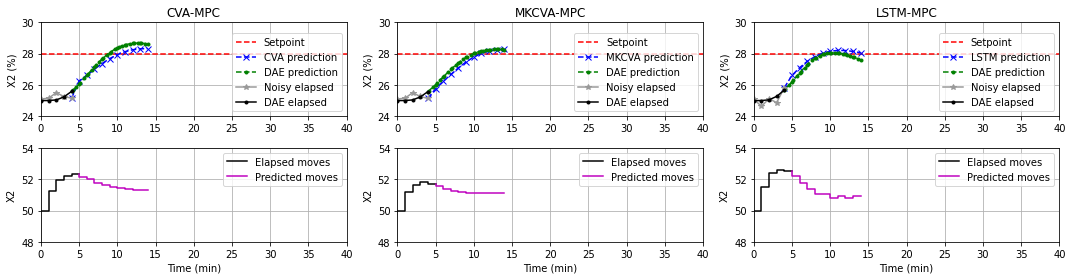

Horizon: 5 min to 15 min


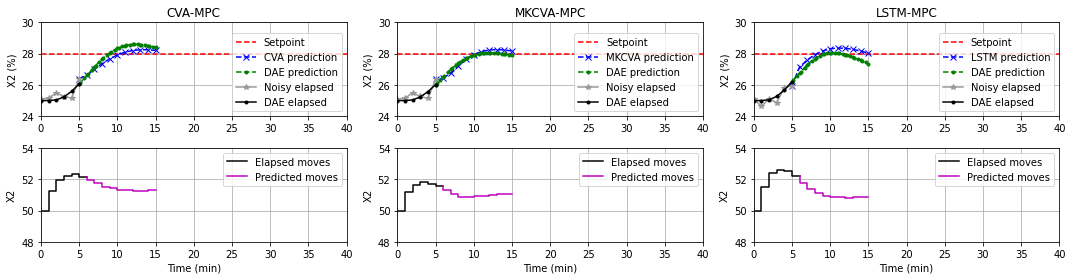

Horizon: 6 min to 16 min


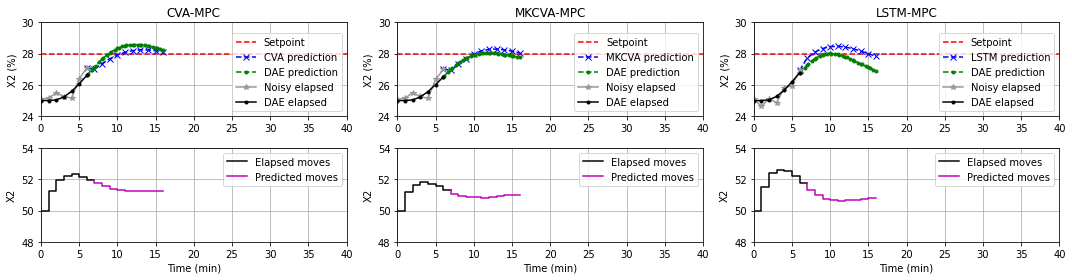

Horizon: 7 min to 17 min


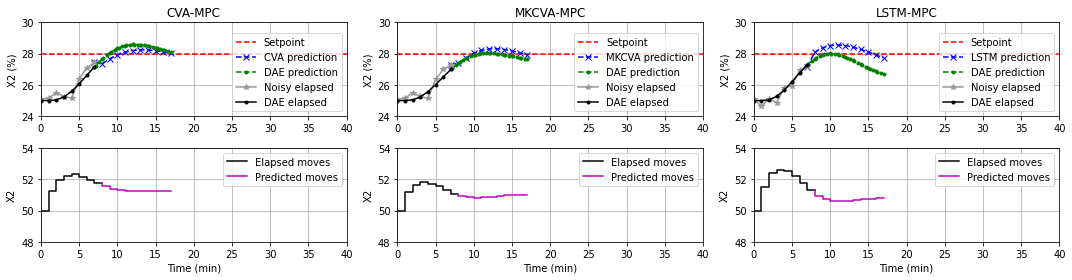

Horizon: 8 min to 18 min


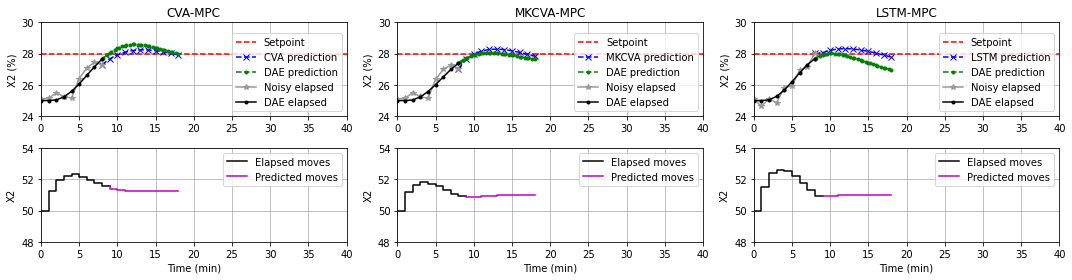

Horizon: 9 min to 19 min


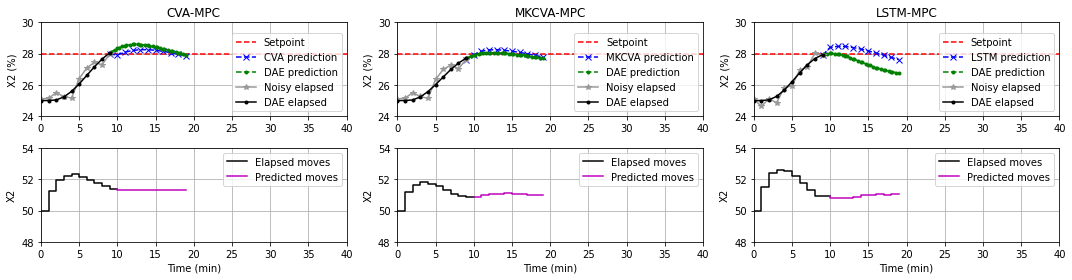

Horizon: 10 min to 20 min


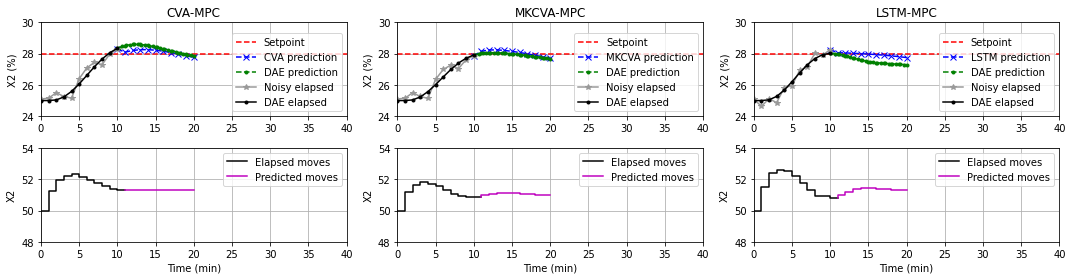

Horizon: 11 min to 21 min


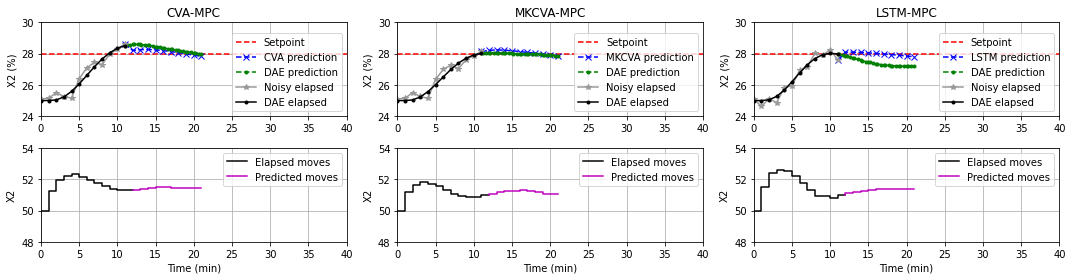

Horizon: 12 min to 22 min


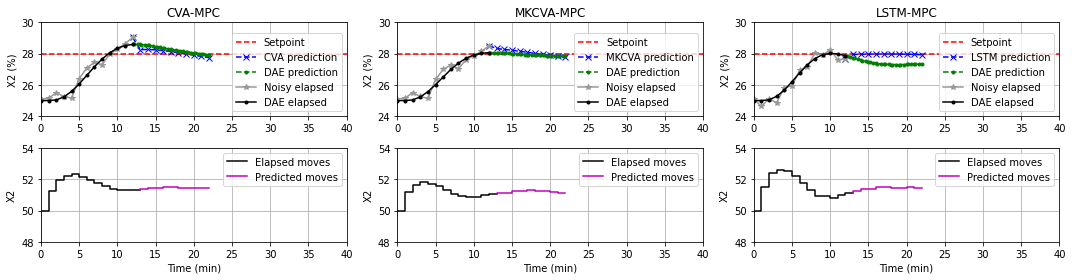

Horizon: 13 min to 23 min


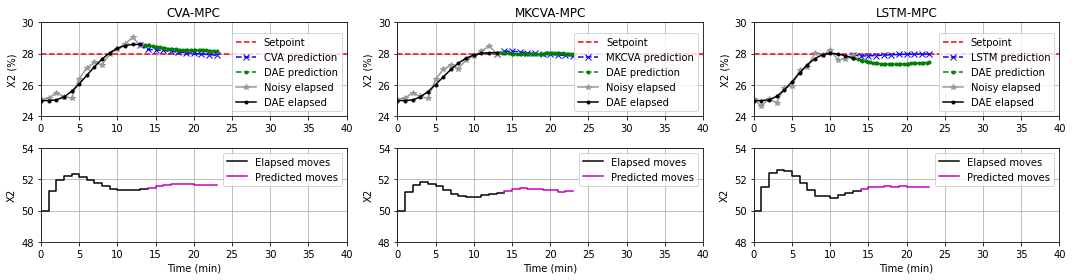

Horizon: 14 min to 24 min


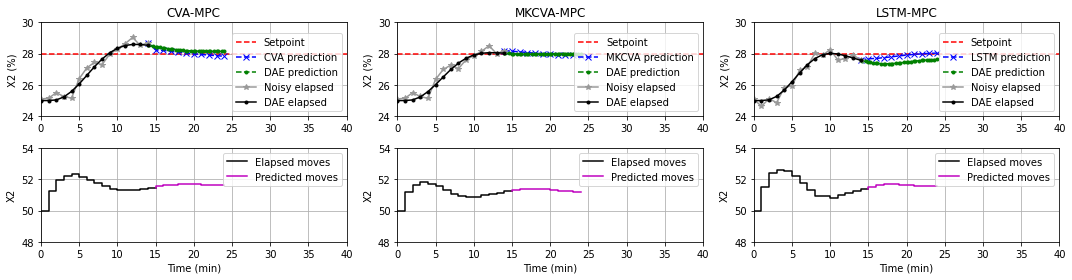

Horizon: 15 min to 25 min


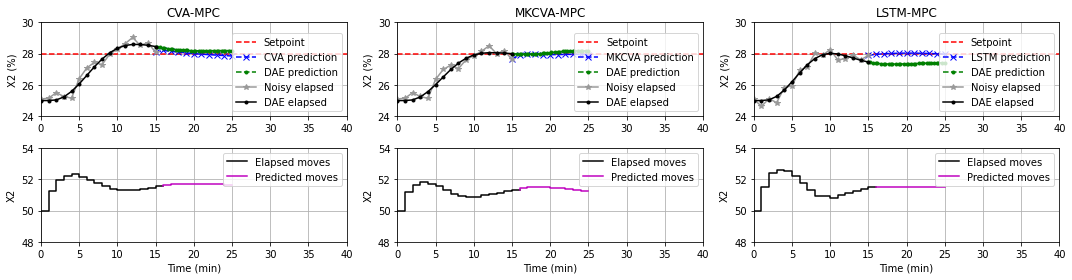

Horizon: 16 min to 26 min


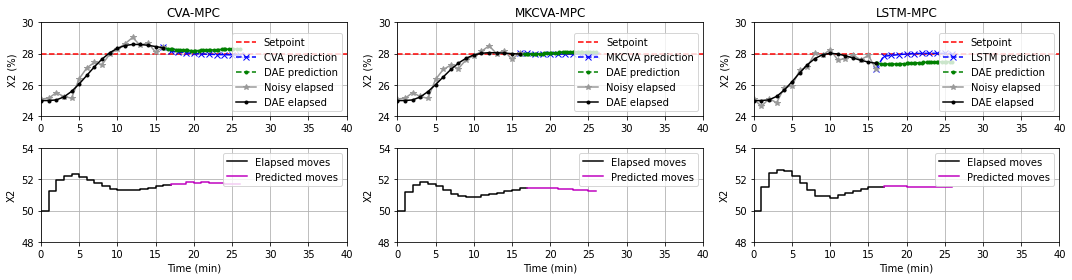

Horizon: 17 min to 27 min


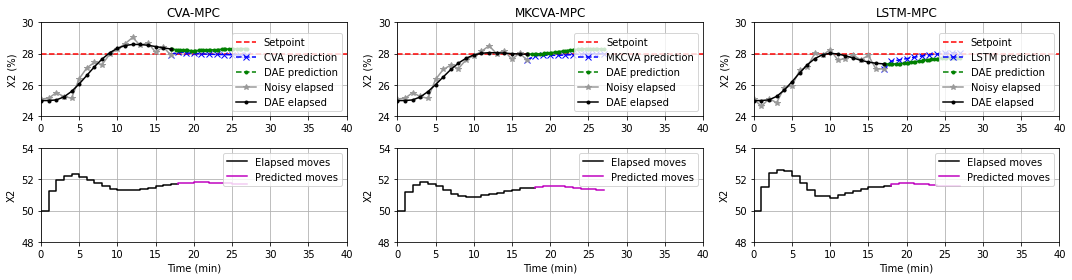

Horizon: 18 min to 28 min


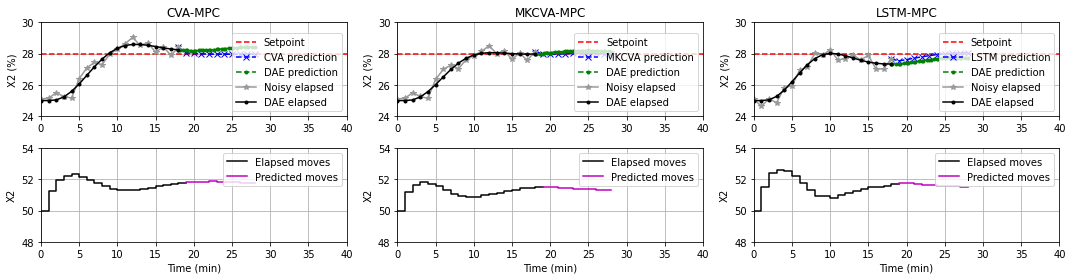

Horizon: 19 min to 29 min


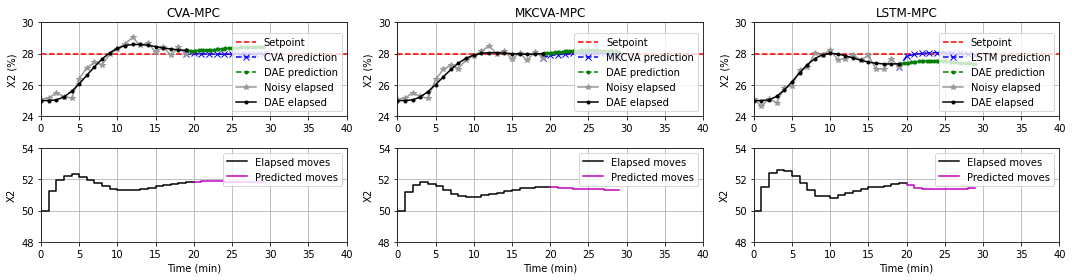

In [41]:
X2_sp = 28    # Setpoint for X2
u_names = ['L2', 'P2', 'X2']

colloc_idx = np.array([0, 0.155051, 0.644949, 1, 1.155051, 1.644949,
                       2, 2.155051, 2.644949, 3, 3.155051, 3.644949,
                       4, 4.155051, 4.644949, 5, 5.155051, 5.644949,
                       6, 6.155051, 6.644949, 7, 7.155051, 7.644949, 
                       8, 8.155051, 8.644949, 9, 9.155051, 9.644949, 10])

for t in range(20):
    cva_u = (cva_u_ipopt[t, :].reshape(-1, 3)-0.5) * np.array([100, 100, 20]) + \
                                                     np.array([208, 194.7, 50])

    mkcva_u = (mkcva_u_ipopt[t, :].reshape(-1, 3)-0.5) * np.array([100, 100, 20]) + \
                                                         np.array([208, 194.7, 50])

    lstm_u = (lstm_u_ipopt[t, :].reshape(-1, 3)-0.5) * np.array([100, 100, 20]) + \
                                                       np.array([208, 194.7, 50])
    
    cva_y = cva_mdl[t, :].reshape(-1, 3)[:, -1]
    mkcva_y = mkcva_mdl[t, :].reshape(-1, 3)[:, -1]
    lstm_y = lstm_mdl[t, :].reshape(-1, 3)[:, -1]
    
    #if t == 4 or t == 6 or t == 8 or t == 10:
    if True:
        print(f"Horizon: {t} min to {t+10} min")
        plt.figure(figsize=(15, 4))
        
        # Plot CVA MPC results
        plt.subplot(2,3,1)
        plt.plot(np.array([0, 40]), np.array([X2_sp, X2_sp]), 'r--', label='Setpoint')
        plt.plot(t + np.arange(0, len(cva_y)), cva_y, 'bx--', label='CVA prediction')
        plt.plot(t + colloc_idx, cva_dae[:, -1, t], 'g.--', label='DAE prediction')
        plt.plot(np.arange(t+1), cva_y_noisy[:t+1, -1], '*-', c='0.6', label='Noisy elapsed')
        plt.plot(np.arange(t+1), cva_y_pyomo[:t+1, -1], 'k.-', label='DAE elapsed')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.legend(loc='lower right')
        plt.title('CVA-MPC')
        plt.ylabel('X2 (%)')
        plt.xlim([0, 40])
        plt.ylim([24, 30])
        plt.grid()

        plt.subplot(2,3,4)
        plt.step(np.arange(t+2), np.hstack((cva_u_save[:t+1, -1], cva_u_save[t, -1])), 
                 where='post', c='k', label='Elapsed moves')
        plt.step(t+1 + np.arange(10), 
                 np.hstack((cva_u_save[t, -1],
                            cva_u[:, 2])),
                 where='pre', c='m', label='Predicted moves')
        plt.ylabel(u_names[2])
        plt.xlabel('Time (min)')
        plt.legend(loc='upper right')
        plt.xlim([0, 40])
        plt.ylim([48, 54])
        #plt.ylim([30, 60])
        plt.grid()
        
        # Plot MKCVA MPC results
        plt.subplot(2,3,2)
        plt.plot(np.array([0, 40]), np.array([X2_sp, X2_sp]), 'r--', label='Setpoint')
        plt.plot(t + np.arange(0, len(mkcva_y)), mkcva_y, 'bx--', label='MKCVA prediction')
        plt.plot(t + colloc_idx, mkcva_dae[:, -1, t], 'g.--', label='DAE prediction')
        plt.plot(np.arange(t+1), mkcva_y_noisy[:t+1, -1], '*-', c='0.6', label='Noisy elapsed')
        plt.plot(np.arange(t+1), mkcva_y_pyomo[:t+1, -1], 'k.-', label='DAE elapsed')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.legend(loc='lower right')
        plt.title('MKCVA-MPC')
        plt.ylabel('X2 (%)')
        plt.xlim([0, 40])
        plt.ylim([24, 30])
        plt.grid()

        plt.subplot(2,3,5)
        plt.step(np.arange(t+2), np.hstack((mkcva_u_save[:t+1, -1], mkcva_u_save[t, -1])), 
                 where='post', c='k', label='Elapsed moves')
        plt.step(t+1 + np.arange(10), 
                 np.hstack((mkcva_u_save[t, -1],
                            mkcva_u[:, 2])),
                 where='pre', c='m', label='Predicted moves')
        plt.ylabel(u_names[2])
        plt.xlabel('Time (min)')
        plt.legend(loc='upper right')
        plt.xlim([0, 40])
        plt.ylim([48, 54])
        #plt.ylim([30, 60])
        plt.grid()
        
        
        # Plot LSTM MPC results
        plt.subplot(2,3,3)
        plt.plot(np.array([0, 40]), np.array([X2_sp, X2_sp]), 'r--', label='Setpoint')
        plt.plot(t + np.arange(0, len(lstm_y)), lstm_y, 'bx--', label='LSTM prediction')
        plt.plot(t + colloc_idx, lstm_dae[:, -1, t], 'g.--', label='DAE prediction')
        plt.plot(np.arange(t+1), lstm_y_noisy[:t+1, -1], '*-', c='0.6', label='Noisy elapsed')
        plt.plot(np.arange(t+1), lstm_y_pyomo[:t+1, -1], 'k.-', label='DAE elapsed')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.legend(loc='lower right')
        plt.title('LSTM-MPC')
        plt.ylabel('X2 (%)')
        plt.xlim([0, 40])
        plt.ylim([24, 30])
        plt.grid()

        plt.subplot(2,3,6)
        plt.step(np.arange(t+2), np.hstack((lstm_u_save[:t+1, -1], lstm_u_save[t, -1])), 
                 where='post', c='k', label='Elapsed moves')
        plt.step(t+1 + np.arange(10), 
                 np.hstack((lstm_u_save[t, -1],
                            lstm_u[:, 2])),
                 where='pre', c='m', label='Predicted moves')
        plt.ylabel(u_names[2])
        plt.xlabel('Time (min)')
        plt.legend(loc='upper right')
        plt.xlim([0, 40])
        plt.ylim([48, 54])
        #plt.ylim([30, 60])
        plt.grid()
        
        plt.tight_layout()
        plt.savefig(f"fig_mpc_cons_hor{t}.png", dpi=300)
        plt.show()